<a href="https://colab.research.google.com/github/Shibli-Nomani/Titanic-Dataset-Exploratory-Data-Analysis-EDA/blob/main/Titanic_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

* **Name: Khan Md Shibli Nomani**

**Dataset:** https://www.kaggle.com/c/titanic/data

The RMS Titanic, which many called unsinkable, sank on April 15, 1912, after striking an iceberg. More than 1,500 of the 2,224 onboarded people died because there were not enough lifeboats. Survival relied in part on luck, but some groups had a much better chance of living than others.

**Tasks:**

1. Download and Load Titanic Datasets (train, test, and gender_submission). All the works perform on train dataset.
2. Data Manipulation
3. Exploratory Data Analysis
4. Basic Statistical Analysis
5. Documentation

# Import Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
# Numerical computing and arrays
import numpy as np
# Basic data visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Statistical data visualization
import seaborn as sns
# Statistical Test (T-test)
from scipy.stats import ttest_ind
# Statistical Test (F-test/ANOVA test)
from scipy.stats import f_oneway
# Statistical Test (Chi-Squared test)
from scipy.stats import chi2_contingency

# Handle and suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 1. Load Datasets and Display Dataset

In [ ]:
# Load training dataset
train_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
# Load testing dataset
test_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')
# Load gender submission dataset
gender_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/gender_submission.csv')


### Display the first 10 rows of the dataframe

In [ ]:
# Display Train Dataset first 10 rows

train_dataset.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Data Manipulation

### 1. Identify and handle missing values appropriately.

In [ ]:
#Shape of Dataset
print(f"Shape of Dataset: {train_dataset.shape}")
# About Dataset
print("About Dataset:", train_dataset.info())


Shape of Dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
About Dataset: None


In [ ]:
# Identify Null Value
train_dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

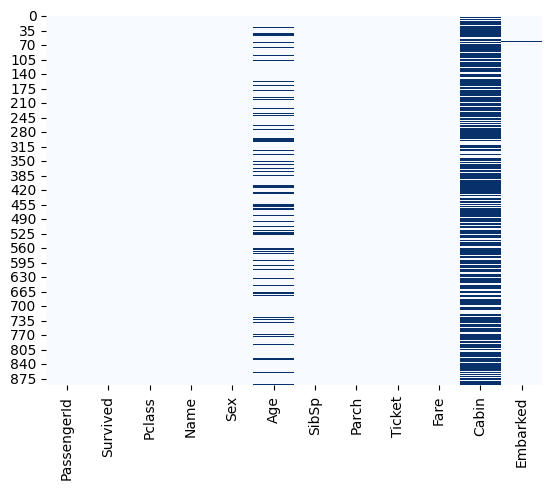

In [ ]:
# Missing Values Heatmap
sns.heatmap(train_dataset.isnull(), cbar=False, cmap="Blues")


**📌 Note:**

**Data Insight:** .shape and .info() helps to determine data size, types, and missing values needed for cleaning. And isnull().sum() counts missing values per column for cleaning.

**Heatmap:** Quick visual highlights of missing data patterns.

**Missing columns:** Age (177), Cabin (687), Embarked (2).

#### Missing Value Treatment of Age Column

In [ ]:
# Correlation check with Numerical Columns

numeric_cols = ['Fare', 'SibSp', 'Parch', 'Pclass']
train_dataset[numeric_cols + ['Age']].corr()['Age'].sort_values(ascending=False)


,Age
Age,1.000000
Fare,0.096067
Parch,-0.189119
SibSp,-0.308247
Pclass,-0.369226


In [ ]:
# Check with Categorical Columns

categorical_cols = ['Sex', 'Pclass', 'Embarked']

for col in categorical_cols:
    print(f"\nMedian Age by {col}:")
    print(train_dataset.groupby(col)['Age'].median())



Median Age by Sex:
Sex
female    27.0
male      29.0
Name: Age, dtype: float64

Median Age by Pclass:
Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median Age by Embarked:
Embarked
C    29.0
Q    27.0
S    28.0
Name: Age, dtype: float64


In [ ]:
# Age statistics by Sex and Pclass
train_dataset.groupby(['Sex','Pclass'])['Age'].describe()


count       mean        std   min     25%   50%    75%   max
Sex    Pclass                                                              
female 1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In [ ]:
# Age Missing Value Imputation (median grouped by Sex & Pclass)
train_dataset['Age'] = train_dataset.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


**📌 Note:**

1. The analysis shows that Age varies across Sex and Passenger Class and these differences reflect biological and socio-economic factors.

2. The median is shown in the 50% column, which presents the middle value of the age distribution and makes it suitable for imputation.

3. Missing Age values are imputed using the median of age with each Sex and Pclass group to preserve demographic patterns.

#### Missing Value Treatment of Cabine Column

In [ ]:
# Create clear comparison table
cabin_stats = train_dataset.groupby('Pclass').agg(
    Cabin_Not_Null=('Cabin', lambda x: x.notnull().sum()),
    Cabin_Null=('Cabin', lambda x: x.isnull().sum()),
    Unique_Cabins=('Cabin', lambda x: x.nunique())
)

# Total passengers per class
cabin_stats['Total'] = cabin_stats['Cabin_Not_Null'] + cabin_stats['Cabin_Null']

# Percentage of not-null cabins
cabin_stats['Pct_Not_Null'] = (cabin_stats['Cabin_Not_Null'] / cabin_stats['Total'] * 100).round(2)

# Reorder columns nicely
cabin_stats = cabin_stats[['Total', 'Cabin_Not_Null', 'Cabin_Null', 'Pct_Not_Null', 'Unique_Cabins']]

print(cabin_stats)



        Total  Cabin_Not_Null  Cabin_Null  Pct_Not_Null  Unique_Cabins
Pclass                                                                
1         216             176          40         81.48            133
2         184              16         168          8.70              7
3         491              12         479          2.44              7


**📌 Note:** Although Cabin columns seem to many missing value, but it has an significants. As we can see mostly Pclass 1 has cabin facility.

1. Cabin holds strongly correlates with passenger class and survival.

2. Missing vlaues are informative (higher class(Pclass 1) has more cabin data).

3. Dropping it would erase useful location and socioeconomic signals.

In [ ]:
# Cabin_Deck created from original Cabin column
train_dataset['Cabin_Deck'] = train_dataset['Cabin'].str[0].fillna('Unknown')

# Binary flag based on Cabin_Deck
train_dataset['Has_Cabin'] = (train_dataset['Cabin_Deck'] != 'Unknown').astype(int)

# Drop Cabin and Cabin_Deck column
train_dataset.drop(columns=['Cabin', 'Cabin_Deck'], inplace=True)

# About Has_Cabin Column
print (f"About Has_Cabin Column: \n {train_dataset['Has_Cabin'].value_counts()}")


About Has_Cabin Column: 
 Has_Cabin
0    687
1    204
Name: count, dtype: int64


**📌 Note:**

1. Extracts info from Cabin and replaces the missing values as Unknown.
2. Creates new Has_Cabin to capture cabin availability (1 = present, 0 = unknown).
3. Drops columns (Cabin, Cabin_Deck) to keep the dataset clean.
4. binary feature helps to avoid sparsity effectively.

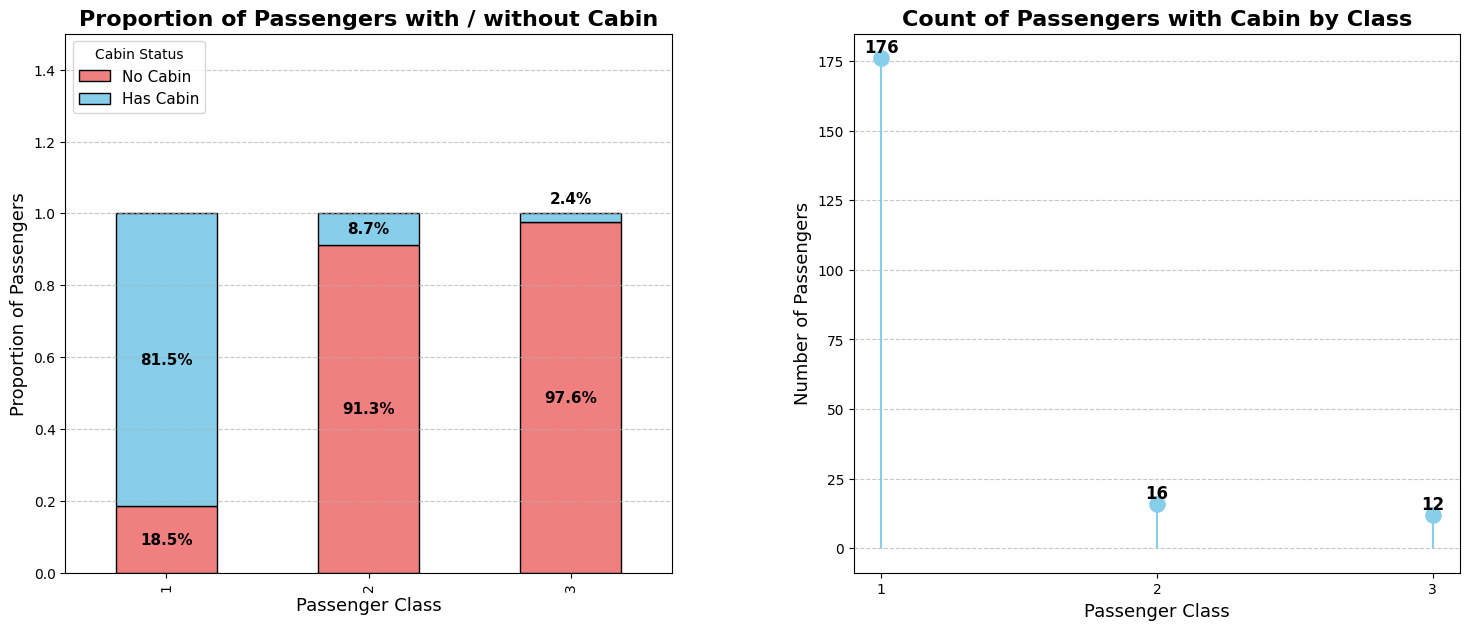

In [ ]:
# ============================================================
# DATA PREPARATION
# ============================================================

# Proportion of passengers with / without cabin by passenger class
prop_stack = (
    train_dataset
    .groupby('Pclass')['Has_Cabin']
    .value_counts(normalize=True)
    .unstack()
)

# Count of passengers who have a cabin (Has_Cabin = 1) by class
has_cabin_counts = (
    train_dataset[train_dataset['Has_Cabin'] == 1]
    .groupby('Pclass')['Has_Cabin']
    .count()
    .reset_index()
)

# ============================================================
# FIGURE SETUP
# ============================================================

fig, axes = plt.subplots(
    1, 2,
    figsize=(18, 7),
    sharey=False,
    gridspec_kw={'wspace': 0.3}
)

# ============================================================
# LEFT SUBPLOT: STACKED BAR CHART (PROPORTION)
# ============================================================

prop_stack.plot(
    kind='bar',
    stacked=True,
    color=['lightcoral', 'skyblue'],
    edgecolor='black',
    ax=axes[0]
)

# ------------------------------------------------------------
# Add percentage labels on stacked bars
# ------------------------------------------------------------

for i, cls in enumerate(prop_stack.index):
    for j, val in enumerate(prop_stack.columns):
        proportion = prop_stack.loc[cls, val]

        # Position label inside or above depending on bar height
        if proportion > 0.03:
            y_pos = prop_stack.iloc[i, :j].sum() + proportion / 2
            va = 'center'
        else:
            y_pos = prop_stack.iloc[i, :j].sum() + proportion + 0.02
            va = 'bottom'

        axes[0].text(
            x=i,
            y=y_pos,
            s=f"{proportion * 100:.1f}%",
            ha='center',
            va=va,
            fontsize=11,
            fontweight='bold',
            color='black'
        )

# ------------------------------------------------------------
# Axis formatting (Left)
# ------------------------------------------------------------

axes[0].set_title(
    'Proportion of Passengers with / without Cabin',
    fontsize=16,
    fontweight='bold'
)
axes[0].set_xlabel('Passenger Class', fontsize=13)
axes[0].set_ylabel('Proportion of Passengers', fontsize=13)
axes[0].set_ylim(0, 1.5)
axes[0].legend(
    ['No Cabin', 'Has Cabin'],
    title='Cabin Status',
    loc='upper left',
    fontsize=11
)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# ============================================================
# RIGHT SUBPLOT: LOLLIPOP CHART (COUNTS)
# ============================================================

axes[1].stem(
    has_cabin_counts['Pclass'],
    has_cabin_counts['Has_Cabin'],
    basefmt=" ",
    linefmt='skyblue'
)

axes[1].scatter(
    has_cabin_counts['Pclass'],
    has_cabin_counts['Has_Cabin'],
    s=120,
    color='skyblue',
    zorder=3
)

# ------------------------------------------------------------
# Add count labels above markers
# ------------------------------------------------------------

for _, row in has_cabin_counts.iterrows():
    axes[1].text(
        row['Pclass'],
        row['Has_Cabin'] + 2,
        f"{row['Has_Cabin']}",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# ------------------------------------------------------------
# Axis formatting (Right)
# ------------------------------------------------------------

axes[1].set_title(
    'Count of Passengers with Cabin by Class',
    fontsize=16,
    fontweight='bold'
)
axes[1].set_xlabel('Passenger Class', fontsize=13)
axes[1].set_ylabel('Number of Passengers', fontsize=13)
axes[1].set_xticks(has_cabin_counts['Pclass'])
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# ============================================================
# FINAL LAYOUT
# ============================================================

plt.show()


**📌 Note:** This chart highlights the percentage of cabin distribution amongst the classes. The Passenger Class 1 is showing 81.5%, Class 2 is 8.7% and Class 3 is showing 2.4%. This shows that, wealth and class have significant influenced with the comfort and cabine facility.

### Drop Null from Embarked Column

In [ ]:
# Shape of Dataset before dropping
print(f"Shape of Dataset before dropping: {train_dataset.shape}")
# Drop rows where Embarked is null
train_dataset = train_dataset.dropna(subset=['Embarked'])
# Shape of Dataset after dropping
print(f"Shape of Dataset after dropping: {train_dataset.shape}")


Shape of Dataset before dropping: (891, 12)
Shape of Dataset after dropping: (889, 12)


**📌 Note:** As Embarked column has only 2 null value and doesn't have any significant impact due to dropping these 2 rows. We have performed the dropping.

<Axes: >

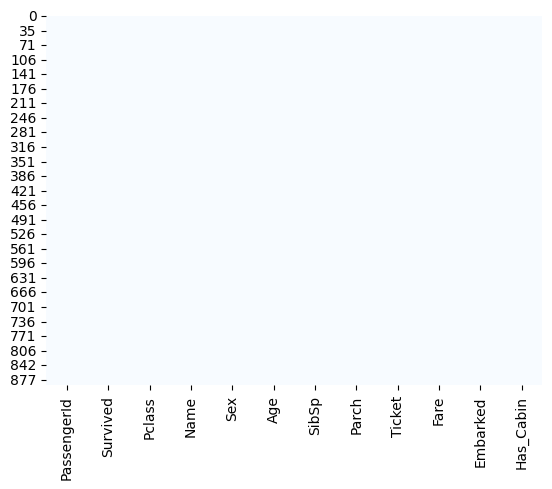

In [ ]:
# Missing Values Heatmap
sns.heatmap(train_dataset.isnull(), cbar=False, cmap="Blues")


### 2. Remove Duplicates Rows only


In [ ]:
# About Dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Has_Cabin    889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [ ]:

# Count duplicates column-wise
duplicates_per_column = train_dataset.apply(lambda x: x.duplicated().sum())
print(duplicates_per_column)

print(f"Shape of Dataset before removing duplicates: {train_dataset.shape}")

# Remove duplicate rows (all columns identical)
train_dataset = train_dataset.drop_duplicates()

print(f"Shape of Dataset after removing duplicates: {train_dataset.shape}")



PassengerId      0
Survived       887
Pclass         886
Name             0
Sex            887
Age            800
SibSp          882
Parch          882
Ticket         209
Fare           642
Embarked       886
Has_Cabin      887
dtype: int64
Shape of Dataset before removing duplicates: (889, 12)
Shape of Dataset after removing duplicates: (889, 12)


**📌 Note:** There is no duplicates rows with entire columns with same values.

### 3. Age Group Feature

In [ ]:
# Age Group Column
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

train_dataset['AgeGroup'] = train_dataset['Age'].apply(age_group)

print(f"Age Group count: {train_dataset['AgeGroup'].value_counts()}")




Age Group count: AgeGroup
Adult     751
Child     113
Senior     25
Name: count, dtype: int64


**📌 Note:** Age Group has been added as new column. It is categorized three groups such as Adult (in between 18 to less than 60), Child (less than 18), and Senior (>=60).

### 4. Family Size and Is Alone Feature (Additional Columns)


In [ ]:
# FamilySize: Total family members including passenger
train_dataset['FamilySize'] = train_dataset['SibSp'] + train_dataset['Parch'] + 1

# IsAlone: 1 if passenger is alone, 0 otherwise
train_dataset['IsAlone'] = (train_dataset['FamilySize'] == 1).astype(int)

print(f"Family Size count: {train_dataset['FamilySize'].value_counts()}")
print(f"Person is alone or in group : {train_dataset['IsAlone'].value_counts()}")



Family Size count: FamilySize
1     535
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64
Person is alone or in group : IsAlone
1    535
0    354
Name: count, dtype: int64


**Column Details:**
* train_dataset['SibSp']: Number of siblings/spouses aboard
* train_dataset['Parch']: Number of Parents (mother, father) + Children (son, daughter, stepson, stepdaughter)

**Additional Columns:**
* train_dataset['FamilySize']: Total Number of Family Members onboarded. 7 groups are travelling with 11 family members.
* train_dataset['IsAlone']: Person is tarvelling alone or not. 535 persons are travelling alone.




### 5. Outlier Detection and Handling Decision


In [ ]:
#About Dataset

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Has_Cabin    889 non-null    int64  
 12  AgeGroup     889 non-null    object 
 13  FamilySize   889 non-null    int64  
 14  IsAlone      889 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 111.1+ KB


In [ ]:
# Outliers Detection

def detect_outliers_iqr(df, columns):
    """
    Detect outliers using IQR method for selected columns.

    Returns:
    - summary_df : count of outliers per column
    - outlier_indices : dict with column-wise row indices
    - outlier_rows : dataframe containing all outlier rows
    """

    outlier_indices = {}
    outlier_rows = pd.DataFrame()
    summary = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

        outlier_indices[col] = indices
        outlier_rows = pd.concat([outlier_rows, df.loc[indices]])

        summary.append({
            'Column': col,
            'Outlier_Count': len(indices),
            'Lower_Bound': round(lower_bound, 2),
            'Upper_Bound': round(upper_bound, 2)
        })

    summary_df = pd.DataFrame(summary)

    return summary_df, outlier_indices, outlier_rows.drop_duplicates()


In [ ]:
# Outlier Summary
outlier_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

summary_df, outlier_indices, outlier_rows = detect_outliers_iqr(
    train_dataset,
    outlier_cols
)

summary_df


,Column,Outlier_Count,Lower_Bound,Upper_Bound
0,Age,32,-0.25,57.75
1,Fare,114,-26.76,65.66
2,SibSp,46,-1.50,2.50
3,Parch,213,0.00,0.00
4,FamilySize,91,-0.50,3.50


In [ ]:
# Appying Age Clipping over Age Column
train_dataset['Age'] = train_dataset['Age'].clip(lower=1, upper=80)


**📌 Note:** Outlier Handling Decisions (Column-wise)

| Column         | Decision          | Validation                                                           |
|----------------|-------------------|--------------------------------------------------------------------------|
| **Age**        | **Capped (1–80)** | Restricts the impact of extreme ages if present        |
| **Fare**       | Kept as-is        | High fares have significant roles (1st class passengers) and outliers indicate important information |
| **SibSp**      | Kept as-is        | Large families are less but valid                                       |
| **Parch**      | Kept as-is        | IQR is not suitable due to dominance of zero values                          |
| **FamilySize** | Kept as-is        | Larger family sizes presents real group travel                           |


#### Box Plot for outlier detection for different columns

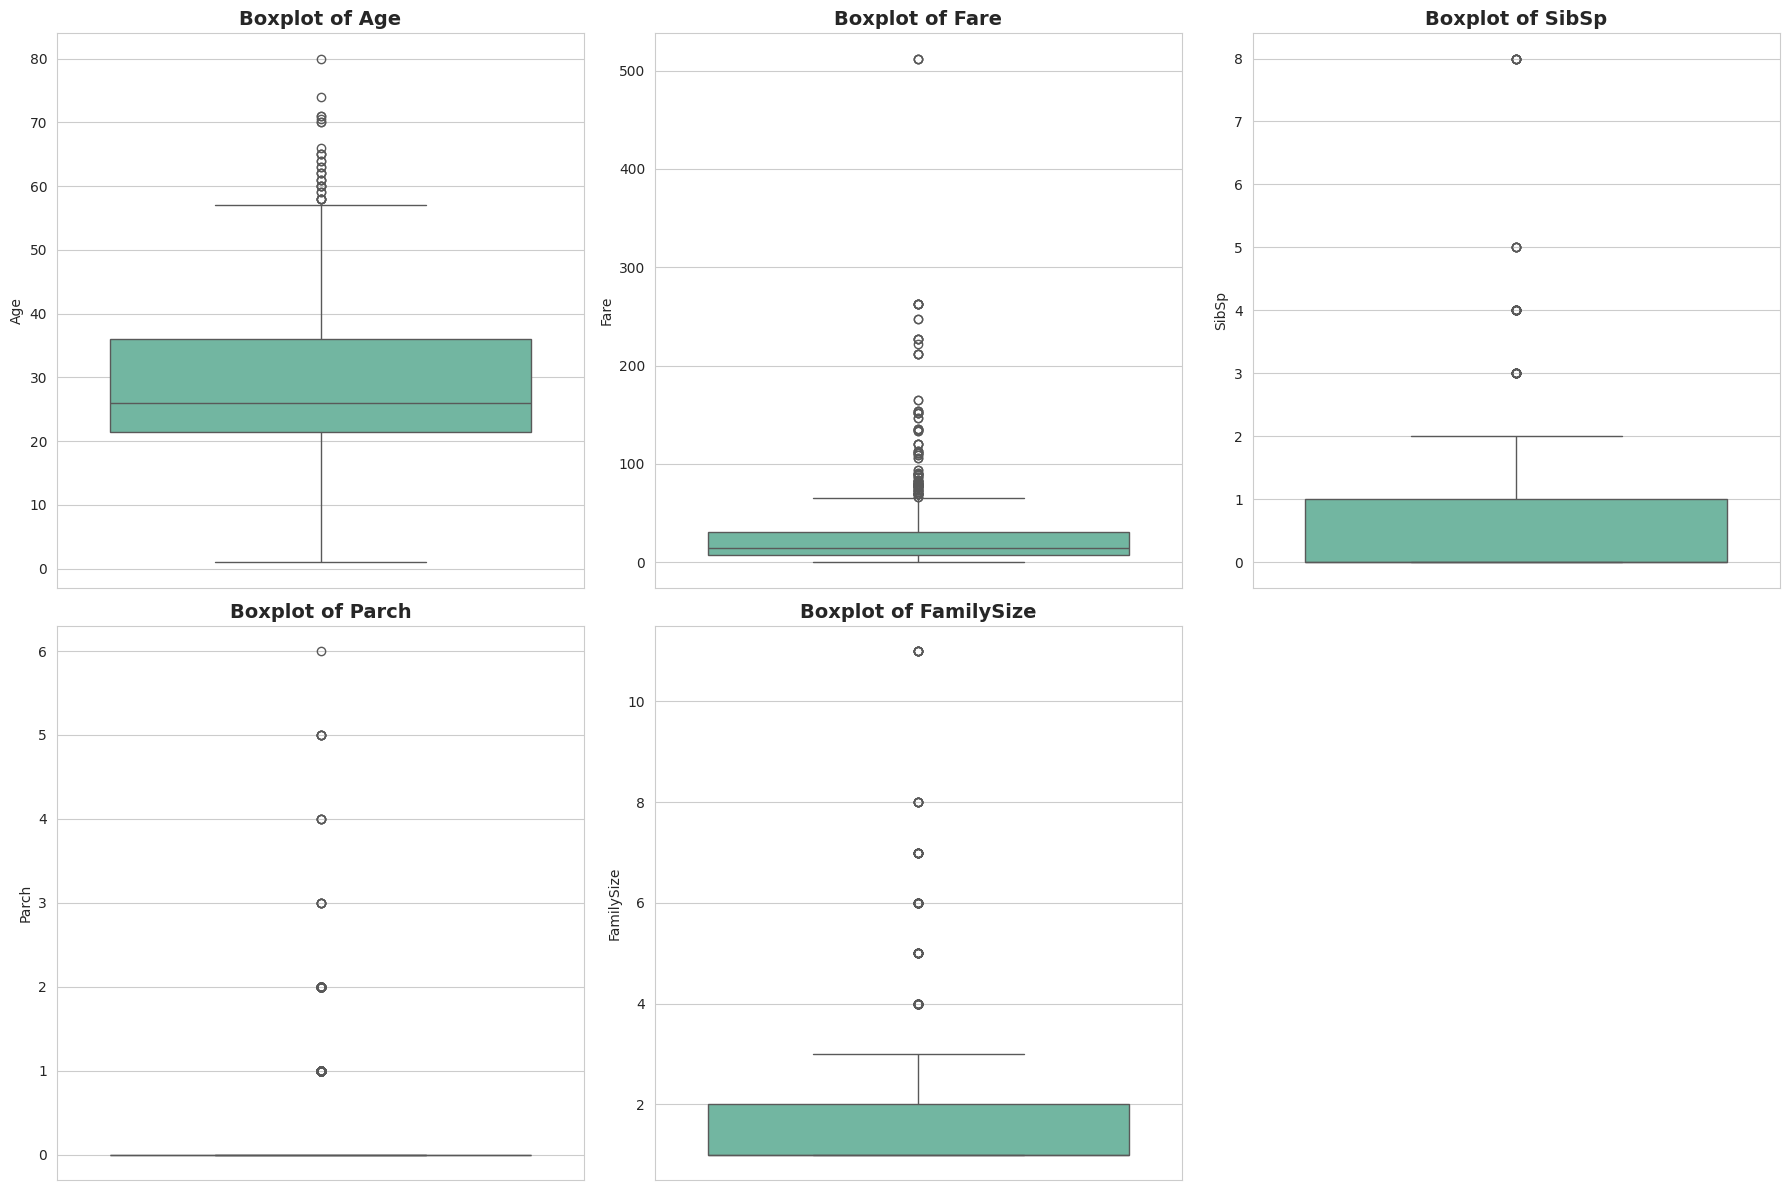

In [ ]:
# ============================================================
# BOXPLOT FUNCTION: OUTLIER DETECTION
# ============================================================

def plot_outlier_boxplots(df, columns):
    """
    Plot boxplots for detecting outliers in numerical columns.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataset
    columns : list
        List of numerical columns to visualize
    """

    # --------------------------------------------------------
    # Plot styling
    # --------------------------------------------------------

    sns.set_style("whitegrid")

    # --------------------------------------------------------
    # Subplot grid configuration
    # --------------------------------------------------------

    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(18, 6 * n_rows)
    )

    axes = axes.flatten()

    # --------------------------------------------------------
    # Create boxplots
    # --------------------------------------------------------

    for i, col in enumerate(columns):
        sns.boxplot(
            y=df[col],
            ax=axes[i],
            palette='Set2'
        )

        axes[i].set_title(
            f'Boxplot of {col}',
            fontsize=14,
            fontweight='bold'
        )
        axes[i].set_ylabel(col)

    # --------------------------------------------------------
    # Remove unused subplots
    # --------------------------------------------------------

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # --------------------------------------------------------
    # Final layout
    # --------------------------------------------------------

    plt.tight_layout()
    plt.show()


# ============================================================
# FUNCTION CALL
# ============================================================

plot_outlier_boxplots(train_dataset, outlier_cols)


## 3. Exploratory Data Analysis:

### 1. A summary of the dataset using descriptive statistics.

In [ ]:
#Description of Numerical Variable
train_dataset.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.067492,0.524184,0.382452,32.096681,0.227222,1.906637,0.601800
std,256.998173,0.486260,0.834700,13.265776,1.103705,0.806761,49.697504,0.419273,1.614703,0.489803
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,224.000000,0.000000,2.000000,21.500000,0.000000,0.000000,7.895800,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,668.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,11.000000,1.000000


In [ ]:
#Description of Object Variable
train_dataset.describe(include='object')


,Name,Sex,Ticket,Embarked,AgeGroup
count,889,889,889,889,889
unique,889,2,680,3,3
top,"Dooley, Mr. Patrick",male,CA. 2343,S,Adult
freq,1,577,7,644,751


**✳️ Insight:** There are 889 passengers in the Titanic dataset, and 15 columns contain both numerical and categorical variables after performing data manipulation. Age has a range of 1-80 years **(mean=29.07, median=26, IQR=21.5-36)** while Fare has the range of 0-512.33 **(mean=32.10, median=14.45)** and displays a right skewed distribution due to the presence of higher first class fares. Most passengers were travelling either alone or as part of a small family (**SibSp mean=0.52, Parch mean=0.38, FamilySize mean=1.91)** and only about **23% had cabins (Has_Cabin)**. The majority of the categorical variables indicate that most passengers were **male (577)**, boarded from port **'S' (644)** and are classified as **Adults (751) between the age of 18 to 60**. The overall **survival rate for all passengers is 38% **and this is closely related to many factors, including Gender, Passenger Class, Fare, Cabin Availability and Family Size. The outliers present in the Age and Fare data are specific to the domain to maintain the meaningful variance.

### 2. Gender Distribution

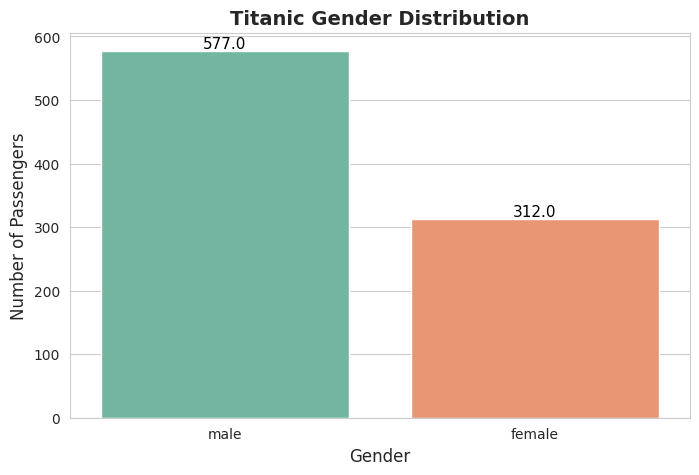

In [ ]:
# ============================================================
# GENDER DISTRIBUTION: COUNTPLOT
# ============================================================

# ------------------------------------------------------------
# Plot styling and figure setup
# ------------------------------------------------------------

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# ------------------------------------------------------------
# Create countplot with professional color palette
# ------------------------------------------------------------

ax = sns.countplot(
    x='Sex',
    data=train_dataset,
    palette='Set2'
)

# ------------------------------------------------------------
# Add value labels on top of bars
# ------------------------------------------------------------

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        color='black'
    )

# ------------------------------------------------------------
# Axis labels and title
# ------------------------------------------------------------

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.title(
    'Titanic Gender Distribution',
    fontsize=14,
    fontweight='bold'
)

# ------------------------------------------------------------
# Display plot
# ------------------------------------------------------------

plt.show()


**✳️ Insight:** There is 577 males and 312 females in the dataset, which refers 65% male and 35% female. Presence of male is almost 2 times more than female.

### 3. Numerical Feature Distribution Plots (Histogram + KDE)

In [ ]:
#About Dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Has_Cabin    889 non-null    int64  
 12  AgeGroup     889 non-null    object 
 13  FamilySize   889 non-null    int64  
 14  IsAlone      889 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 143.4+ KB


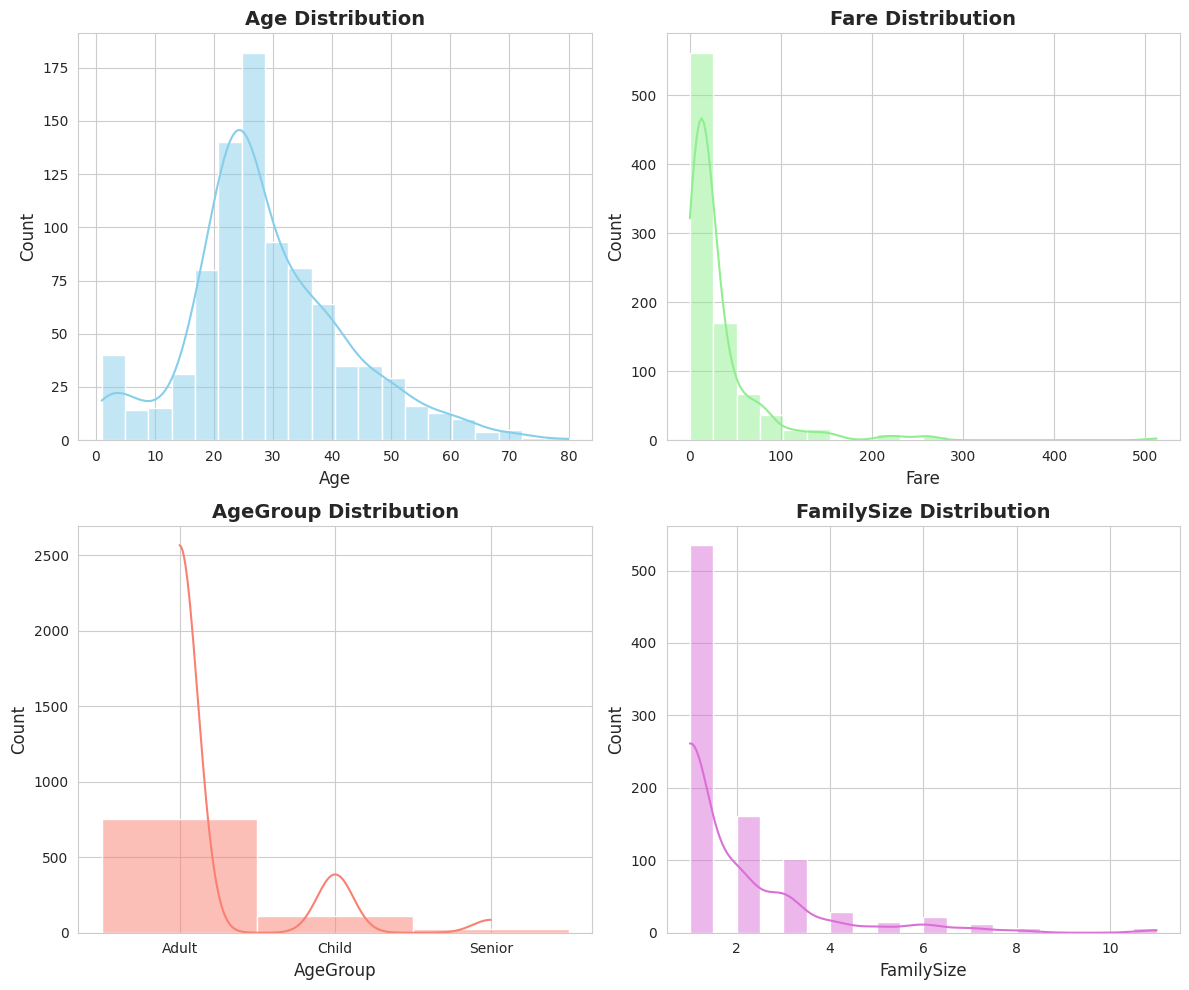

In [ ]:
# ============================================================
# KDE & HISTOGRAM PLOTS: DISTRIBUTION ANALYSIS
# ============================================================

# ------------------------------------------------------------
# Plot styling
# ------------------------------------------------------------

sns.set_style("whitegrid")

# ------------------------------------------------------------
# Columns and color configuration
# ------------------------------------------------------------

columns_to_plot = ['Age', 'Fare', 'AgeGroup', 'FamilySize']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

# ------------------------------------------------------------
# Figure and subplot setup
# ------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# ------------------------------------------------------------
# Generate histogram + KDE plots
# ------------------------------------------------------------

for i, col in enumerate(columns_to_plot):
    sns.histplot(
        data=train_dataset,
        x=col,
        kde=True,
        color=colors[i],
        ax=axes[i],
        bins=20
    )

    axes[i].set_title(
        f'{col} Distribution',
        fontsize=14,
        fontweight='bold'
    )
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# ------------------------------------------------------------
# Final layout
# ------------------------------------------------------------

plt.tight_layout()
plt.show()


**✳️ Insight:**

* **Distribution of Age (Light blue):** The age distribution for everyone on board is bimodal, or has two peaks – one peak between ages 20 and 35, and the second peak is between ages 0 and 10.

* **Distribution of Fare (Green):** The fare distribution has the positive skewness with a long tail to 500 dollar. The majority of passengers paid less than 50 dollar for their fare.

* **Distribution of AgeGroup (Salmon):** An age distribution was created using three categories of age – Adult (ages 18 to under 60), Child ( under 18), and Senior (ages 60 and over). The Adult category comprises approximately 75% of the passengers on board.

* **Distribution of Family Size (Purple):** The family size distribution is primarily comprised of solo travelers (>500), whereas approximately 160 combined passengers traveled as part of a pair.


### 4. Survival Rate by Gender & Class

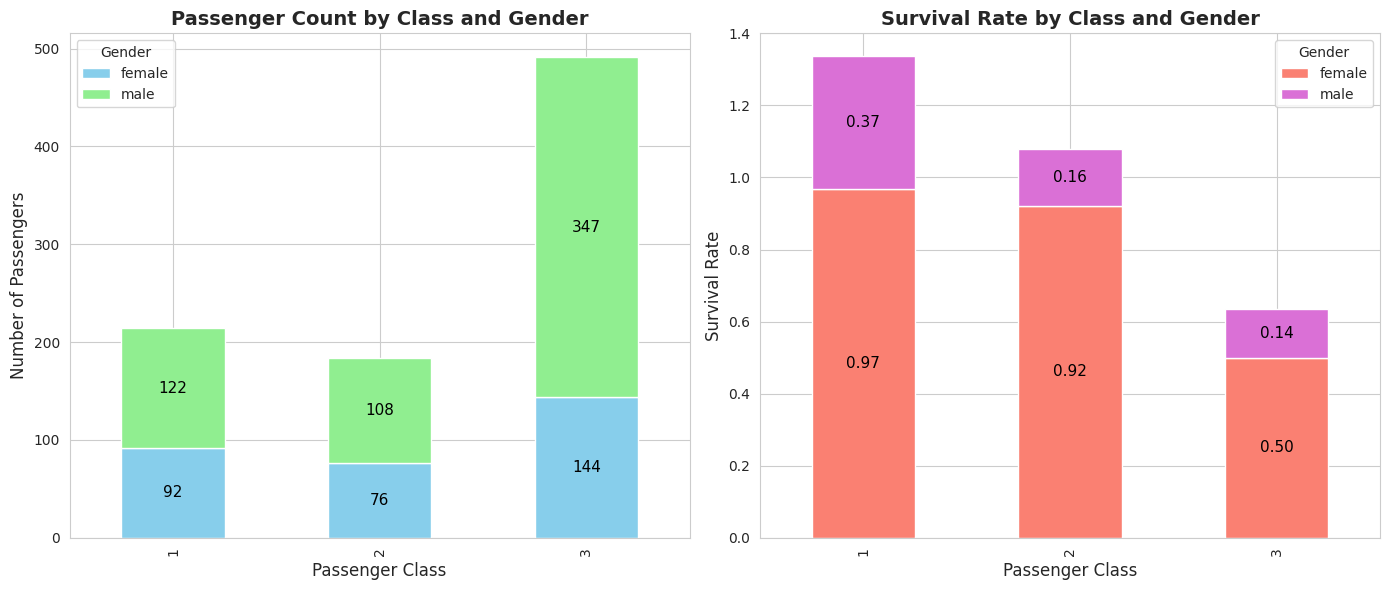

In [ ]:
# ============================================================
# SURVIVAL ANALYSIS: COUNT & RATE BY CLASS AND GENDER
# ============================================================

# ------------------------------------------------------------
# Plot styling
# ------------------------------------------------------------

sns.set_style("whitegrid")

# ------------------------------------------------------------
# Data preparation
# ------------------------------------------------------------

# Passenger counts by class and gender
count_data = (
    train_dataset
    .groupby(['Pclass', 'Sex'])['Survived']
    .count()
    .unstack()
)

# Survival rate (mean survival) by class and gender
percent_data = (
    train_dataset
    .groupby(['Pclass', 'Sex'])['Survived']
    .mean()
    .unstack()
)

# ------------------------------------------------------------
# Color configuration
# ------------------------------------------------------------

colors_count = ['skyblue', 'lightgreen']
colors_percent = ['salmon', 'orchid']

# ------------------------------------------------------------
# Figure setup
# ------------------------------------------------------------

fig, axes = plt.subplots(
    1, 2,
    figsize=(14, 6),
    sharey=False
)

# ============================================================
# LEFT SUBPLOT: PASSENGER COUNT (STACKED BAR)
# ============================================================

count_data.plot(
    kind='bar',
    stacked=True,
    color=colors_count,
    ax=axes[0]
)

axes[0].set_title(
    'Passenger Count by Class and Gender',
    fontsize=14,
    fontweight='bold'
)
axes[0].set_xlabel('Passenger Class', fontsize=12)
axes[0].set_ylabel('Number of Passengers', fontsize=12)

# ------------------------------------------------------------
# Add count labels inside bars
# ------------------------------------------------------------

for i, cls in enumerate(count_data.index):
    bottom = 0
    for sex in count_data.columns:
        val = count_data.loc[cls, sex]
        axes[0].text(
            i,
            bottom + val / 2,
            f'{val}',
            ha='center',
            va='center',
            fontsize=11,
            color='black'
        )
        bottom += val

axes[0].legend(title='Gender')

# ============================================================
# RIGHT SUBPLOT: SURVIVAL RATE (STACKED BAR)
# ============================================================

percent_data.plot(
    kind='bar',
    stacked=True,
    color=colors_percent,
    ax=axes[1]
)

axes[1].set_title(
    'Survival Rate by Class and Gender',
    fontsize=14,
    fontweight='bold'
)
axes[1].set_xlabel('Passenger Class', fontsize=12)
axes[1].set_ylabel('Survival Rate', fontsize=12)
axes[1].set_ylim(0, 1.4)

# ------------------------------------------------------------
# Add percentage labels inside bars
# ------------------------------------------------------------

for i, cls in enumerate(percent_data.index):
    bottom = 0
    for sex in percent_data.columns:
        val = percent_data.loc[cls, sex]
        axes[1].text(
            i,
            bottom + val / 2,
            f'{val:.2f}',
            ha='center',
            va='center',
            fontsize=11,
            color='black'
        )
        bottom += val

axes[1].legend(title='Gender')

# ============================================================
# FINAL LAYOUT
# ============================================================

plt.tight_layout()
plt.show()


**✳️ Insight:**

* **Passenger Count by Class and Gender:**
 The representation of males in passenger class-3 is much greater than that of females (347 males vs. 144 females) suggesting a very uneven representation of males in a low socioeconomic category.

* **Survival Rate by Class and Gender:**
Survival is drastically classifed by both gender and class; while females in 1st class had a near-perfect survival rate of 0.97, females in 3rd class dropped significantly to 0.50. Overall, Female survival rate is higher than the male survial rate.

### 5. Survival Rate by Age Groups


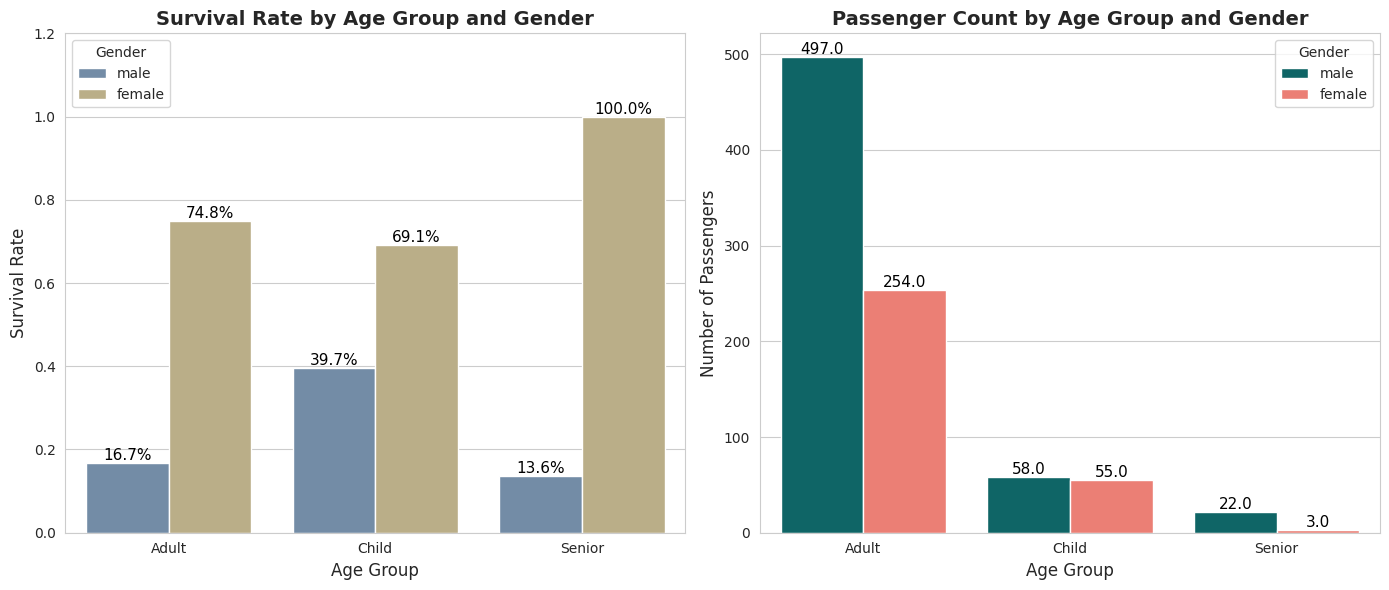

In [ ]:
# ============================================================
# SURVIVAL ANALYSIS BY AGE GROUP AND GENDER
# ============================================================

# ------------------------------------------------------------
# Plot styling
# ------------------------------------------------------------

sns.set_style("whitegrid")

# ------------------------------------------------------------
# Color palette (professional & PPT-ready)
# ------------------------------------------------------------

palette = {
    'male':   '#6B8CAE',   # Steel Blue
    'female': '#C2B280'   # Sand
}


# ------------------------------------------------------------
# Figure setup
# ------------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ============================================================
# LEFT SUBPLOT: SURVIVAL RATE BY AGE GROUP & GENDER
# ============================================================

sns.barplot(
    x='AgeGroup',
    y='Survived',
    hue='Sex',
    data=train_dataset,
    palette=palette,
    ci=None,
    ax=axes[0]
)

axes[0].set_title(
    'Survival Rate by Age Group and Gender',
    fontsize=14,
    fontweight='bold'
)
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Survival Rate', fontsize=12)
axes[0].set_ylim(0, 1.2)

# ------------------------------------------------------------
# Annotate survival percentages on bars
# ------------------------------------------------------------

for p in axes[0].patches:
    height = p.get_height()
    if height > 0:
        axes[0].annotate(
            f'{height * 100:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            fontsize=11,
            color='black'
        )

axes[0].legend(title='Gender')

# ============================================================
# RIGHT SUBPLOT: PASSENGER COUNT BY AGE GROUP & GENDER
# ============================================================

# ------------------------------------------------------------
# Color palette
# ------------------------------------------------------------
palette = {"male": "#017374", "female": "#FF6F61"}  # Deep Cyan / Coral

sns.countplot(
    x='AgeGroup',
    hue='Sex',
    data=train_dataset,
    palette=palette,
    ax=axes[1]
)

axes[1].set_title(
    'Passenger Count by Age Group and Gender',
    fontsize=14,
    fontweight='bold'
)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('Number of Passengers', fontsize=12)

# ------------------------------------------------------------
# Annotate passenger counts on bars
# ------------------------------------------------------------

for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(
            f'{height}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            fontsize=11,
            color='black'
        )

axes[1].legend(title='Gender')

# ============================================================
# FINAL LAYOUT
# ============================================================

plt.tight_layout()
plt.show()


**✳️ Insight:**

* **Survival Rate by Age Group and Gender:**
Gender is a greater predictor of survival. Senior Female has a perfect 100% survival rate, despite being the group with the least number of people in it. Survival of Male Adults is 16.7% and that of Female Adults is 74.8%.

* **Passenger Count by Age Group and Gender:**
The largest amount of passengers are from Adult Male passengers (497) and Adult Female passengers (254). And the ratio is 2:1. Male passengers count is higher in each Age group.

### 6. Relationship with Fare, Has Cabin and Survival

/tmp/ipython-input-1017320306.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(fare_labels)


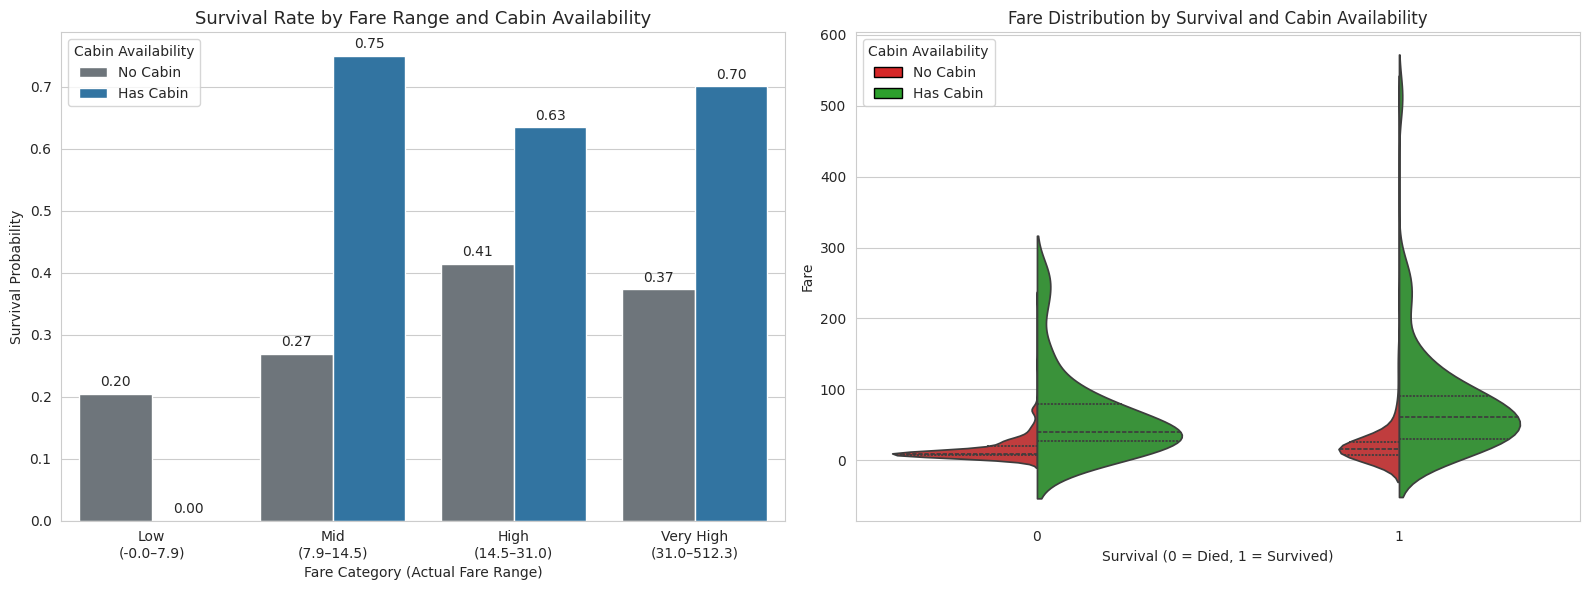

In [ ]:

# ------------------------------------------------------------
# Create a temporary copy of the dataset
# ------------------------------------------------------------
temp_df = train_dataset.copy()

# ------------------------------------------------------------
# Create Fare Bands (Quartiles) in temp_df only
# ------------------------------------------------------------
temp_df["FareBand"] = pd.qcut(
    temp_df["Fare"],
    4,
    labels=["Low", "Mid", "High", "Very High"]
)

# Extract actual fare ranges for labels
fare_ranges = pd.qcut(temp_df["Fare"], 4).unique()
fare_ranges = sorted(fare_ranges, key=lambda x: x.left)

fare_labels = [
    f"{band}\n({round(r.left,1)}–{round(r.right,1)})"
    for band, r in zip(["Low", "Mid", "High", "Very High"], fare_ranges)
]

# ------------------------------------------------------------
# Figure setup
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ============================================================
# LEFT SUBPLOT: Survival Rate by FareBand & Cabin
# ============================================================
ax1 = sns.barplot(
    data=temp_df,
    x="FareBand",
    y="Survived",
    hue="Has_Cabin",
    ci=None,
    palette={0: "#6c757d", 1: "#1f77b4"},  # Gray / Blue
    ax=axes[0]
)

# Update x-axis labels with actual fare ranges
axes[0].set_xticklabels(fare_labels)
axes[0].set_title(
    "Survival Rate by Fare Range and Cabin Availability",
    fontsize=13
)
axes[0].set_xlabel("Fare Category (Actual Fare Range)")
axes[0].set_ylabel("Survival Probability")
axes[0].legend(title="Cabin Availability", labels=["No Cabin", "Has Cabin"])

# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.2f", padding=3)

# ============================================================
# RIGHT SUBPLOT: Fare Distribution by Survival & Cabin
# ============================================================
cabin_palette = {0: "#d62728", 1: "#2ca02c"}  # Red / Green

sns.violinplot(
    data=temp_df,
    x="Survived",
    y="Fare",
    hue="Has_Cabin",
    split=True,
    inner="quartile",
    palette=cabin_palette,
    ax=axes[1]
)

axes[1].set_title(
    "Fare Distribution by Survival and Cabin Availability",
    fontsize=12
)
axes[1].set_xlabel("Survival (0 = Died, 1 = Survived)")
axes[1].set_ylabel("Fare")

# Custom legend for violin plot
legend_elements = [
    Patch(facecolor="#d62728", edgecolor="black", label="No Cabin"),
    Patch(facecolor="#2ca02c", edgecolor="black", label="Has Cabin")
]
axes[1].legend(handles=legend_elements, title="Cabin Availability", loc="upper left")

# ------------------------------------------------------------
# Final layout
# ------------------------------------------------------------
plt.tight_layout()
plt.show()


**✳️ Insight:**

* **Survival Rate by Fare and Cabin:** The chances of survival increase dramatically based on whether or not an individual had their cabin. Passengers in the Mid Fare Range (Cabin) has a 75% chance of survival vs. 27% chance of survival to passengers who do not have cabins recorded. Furthermore, High Fare range passengers who have cabins recorded in the records are recorded to have a survival rate of 37%; Similarly, Very High Fare range passengers are recorded to have a survival of 70%.

* **Fare Distribution and Density:** Passengers who survive have much higher ticket fares and recorded cabin numbers, while those who die are heavily concentrated in the lowest fare bracket without a cabin. The presence of a cabin (green) acts as a clear indicator of higher status and significantly better survival outcomes compared to those without one (red). Chances of survival are also associated with high fare prices as well.

### 7. Relationship with Family size, Gender and Survival

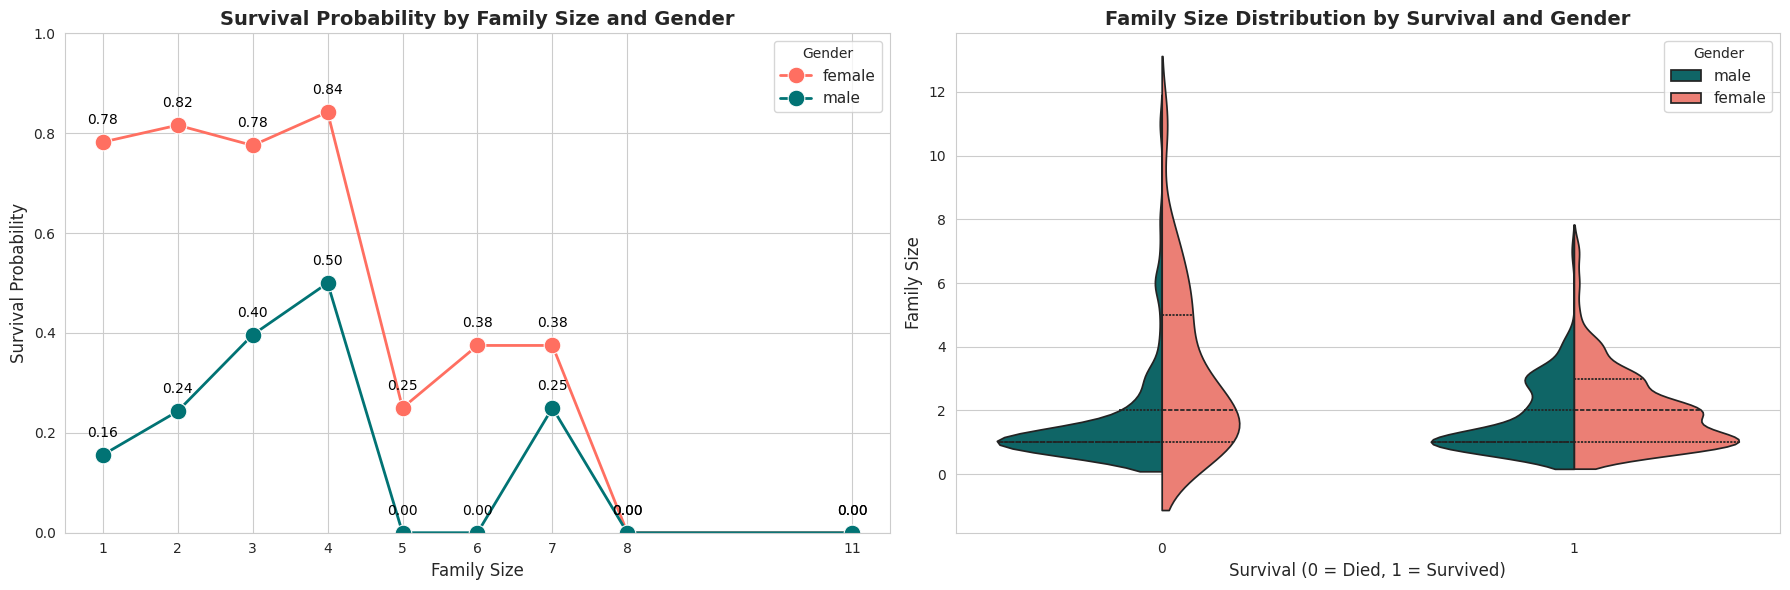

In [ ]:

# ------------------------------------------------------------
# Color palette
# ------------------------------------------------------------
palette = {"male": "#017374", "female": "#FF6F61"}  # Deep Cyan / Coral

# ------------------------------------------------------------
# Figure setup
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# ============================================================
# LEFT: Lineplot for Survival Probability by Family Size
# ============================================================
# Aggregate survival probability per FamilySize and Sex
agg = train_dataset.groupby(['FamilySize', 'Sex'])['Survived'].mean().reset_index()

sns.lineplot(
    data=agg,
    x='FamilySize',
    y='Survived',
    hue='Sex',
    palette=palette,
    marker='o',
    markersize=12,  # <-- larger markers
    linewidth=2,
    ax=axes[0]
)

axes[0].set_title("Survival Probability by Family Size and Gender", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Family Size", fontsize=12)
axes[0].set_ylabel("Survival Probability", fontsize=12)
axes[0].set_ylim(0, 1)
axes[0].legend(title="Gender", fontsize=11)

# Annotate points exactly at markers
for i, row in agg.iterrows():
    axes[0].text(
        row['FamilySize'], row['Survived'] + 0.03,
        f"{row['Survived']:.2f}",
        ha='center', va='bottom', fontsize=10, color='black'
    )
# -----------------------------
# Fix x-axis ticks to show 1,2,3...
# -----------------------------
family_sizes = sorted(train_dataset['FamilySize'].unique())
axes[0].set_xticks(family_sizes)
axes[0].set_xticklabels(family_sizes)

# ============================================================
# RIGHT: Violin Plot for Survival Distribution
# ============================================================
sns.violinplot(
    data=train_dataset,
    x="Survived",
    y="FamilySize",
    hue="Sex",
    split=True,
    inner="quartile",
    palette=palette,
    ax=axes[1]
)

axes[1].set_title("Family Size Distribution by Survival and Gender", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Survival (0 = Died, 1 = Survived)", fontsize=12)
axes[1].set_ylabel("Family Size", fontsize=12)
axes[1].legend(title="Gender", loc="upper right", fontsize=11)

# ------------------------------------------------------------
# Final layout
# ------------------------------------------------------------
plt.tight_layout()
plt.show()


**✳️ Insight:**

* **Survival by Family Size and Gender:**
The chances of survival for females consistently exceed those of males in every family size category, with females in families of four having an especially high chance of survival (0.84). Both genders have higher chances of surviving in smaller and mid-sized families (2-4) compared to their respective chances of survival within larger family sizes.

* **Family Size Distribution and Survival:**
The majority of deceased individuals are found in the solo traveller (family size = 1) category, while the majority of survivors fall within family sizes 1 - 3.



## 4. Statistical Analysis

In [ ]:
#Datframe
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,AgeGroup,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Adult,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Adult,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Adult,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Adult,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Adult,1,1


### 1. Mean, Median, Mode of Age, Fare, and FamilySize

In [ ]:
# Mean Median Mode

numeric_cols = ['Age', 'Fare', 'FamilySize']

# Compute mean, median
agg_stats = train_dataset[numeric_cols].agg(['mean', 'median'])

# Compute mode (first value if multiple)
mode_stats = train_dataset[numeric_cols].mode().iloc[0]

# Add mode as a row to agg_stats
agg_stats.loc['mode'] = mode_stats

# Optional: transpose for better readability
agg_stats = agg_stats.T  # columns become 'mean', 'median', 'mode'

# Display the combined dataframe
print(agg_stats)


                 mean   median   mode
Age         29.067492  26.0000  25.00
Fare        32.096681  14.4542   8.05
FamilySize   1.906637   1.0000   1.00


**✳️ Insight:**

* **Age:** The average age of the passengers is around 29 years; however, both the median and mode of the data set are lower than the average; therefore, it is possible that there were older passengers in the group, which skews the average age.

* **Fare**: The average fare is 32 dollar. However, the median fare is much lower (14.45 dollar), and the mode is even lower (8.05 dollar). This indicates that most passengers paid low fares, while a few purchased very expensive tickets.

* **FamilySize:** Most passengers travel as small groups. The median and mode for FamilySize are both 1, with a slightly higher mean of 1.9. This means that a few larger families are affecting the average family size.

### 2. T-test: Survival vs Gender

In [ ]:

# T-Test
male_survival = train_dataset[train_dataset['Sex']=='male']['Survived']
female_survival = train_dataset[train_dataset['Sex']=='female']['Survived']

# Perform independent t-test
t_stat, pvalue = ttest_ind(male_survival, female_survival)

# Set significance level
alpha = 0.05

# Make decision
if pvalue < alpha:
    print("Reject H0: Survival differs by gender")
else:
    print("Fail to reject H0: No evidence of difference")

# Optional: print t-statistic and p-value
print(f"T-statistic: {t_stat:.3f}, P-value: {pvalue:.3e}, significance level: {alpha}")


Reject H0: Survival differs by gender
T-statistic: -19.187, P-value: 6.682e-69, significance level: 0.05


**✳️ Insight:**

1. **t-value** is **-19.187**. It refers significant difference betwwen male and female survival. Male is lower than the female.
2. **p-value** is extremely small **(6.682e-69)**, which rejects null hypothesis (survival rate of male and female same). Therefore, survival rate is different based on gender.
3. significance level **(alpha)**: **0.05**

### 3. ANOVA Test: Survival vs 3 Passenger Classes

In [ ]:

# Prepare survival data by class
surv_class1 = train_dataset[train_dataset['Pclass'] == 1]['Survived']
surv_class2 = train_dataset[train_dataset['Pclass'] == 2]['Survived']
surv_class3 = train_dataset[train_dataset['Pclass'] == 3]['Survived']


# Perform one-way ANOVA
f_stat, pvalue = f_oneway(surv_class1, surv_class2, surv_class3)


# Set significance level
alpha = 0.05


# Make decision
if pvalue < alpha:
    print("Reject H0: Survival differs across passenger classes")
else:
    print("Fail to reject H0: No evidence of difference among classes")


# Optional: print F-statistic and p-value
print(f"F-statistic: {f_stat:.3f}, P-value: {pvalue:.3e}, significance level: {alpha}")


Reject H0: Survival differs across passenger classes
F-statistic: 56.768, P-value: 6.345e-24, significance level: 0.05


**✳️ Insight:**

1. **f-value** is **56.768**. It refers significant difference amongst passenger classes(1,2,3). If f = 0, identical and If f=1, value are very close to each other for all passenger classes
2. **p-value** is extremely small **(6.345e-24)**, which rejects null hypothesis (survival rate of male and female same). Therefore, survival rate is different accross passenger classes.
3. significance level **(alpha)**: **0.05**

### 4. Chi-Squared-test: Survival vs AgeGroup (Child, Adult, Senior)

In [ ]:

# Create a contingency table (counts)
contingency_table = pd.crosstab(train_dataset['AgeGroup'], train_dataset['Survived'])
print("Contingency Table:\n", contingency_table)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.3e}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


# Decision at significance level alpha=0.05
alpha = 0.05
if p_value < alpha:
    print("\nReject H0: AgeGroup and Survival are associated")
else:
    print("\nFail to reject H0: No evidence of association between AgeGroup and Survival")


Contingency Table:
 Survived    0    1
AgeGroup          
Adult     478  273
Child      52   61
Senior     19    6

Chi-Square Statistic: 15.137
P-value: 5.164e-04
Degrees of Freedom: 2
Expected Frequencies:
[[463.7784027  287.2215973 ]
 [ 69.78290214  43.21709786]
 [ 15.43869516   9.56130484]]

Reject H0: AgeGroup and Survival are associated


**✳️ Insight:**

1. Survival based on AgeGroup. Children survive more in propotion as comaped to Adult and Senior.
2. **Chi-Square Statistic: 15.137**. It refers significant difference amongst AgeGroup(Child, Adult, Senior). If Chi-Square = 0, no difference among group.
3. **p-value** is extremely small **(5.164e-04)**, which rejects null hypothesis (survival rate of male and female same). Therefore, survival rate is different accross passenger classes.
4. significance level **(alpha)**: **0.05**

### 5. Correlation amongs Age, Fare, FamilySize, Has_Cabin, IsAlone, and Survived

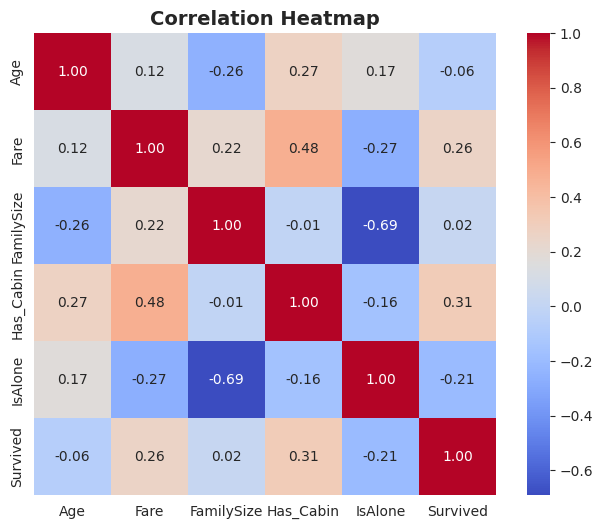

In [ ]:

# Select relevant numeric columns
corr_cols = ['Age', 'Fare', 'FamilySize', 'Has_Cabin', 'IsAlone', 'Survived']
corr = train_dataset[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()


**✳️ Insight:**

Fare and Age are also correlated with Has_Cabin. Fare is also correlated to FamilySize. Overall Fare and Has_Cabin have strong correlation with Survival.

## 📌 Final Summary: Titanic Dataset Analysis

Following is a summary of the findings.

* **Data Manipulation and Integrity:**
To refine this dataset, I have imputed missing Age values with Sex/Class medians; and the previously sparse Cabin column is now a binary Has_Cabin variable. To preserve data integrity, I keep all the ages within an allowable range of 1 through 80. combined into one column the Parch and SibSp columns have combined into one column FamilySize. Outlires of Fare and FamilySize remain as it is, since they act as social and economic indicators.

* **Socioeconomic survival drivers include:**
Wealth clearly contributes to survival. Out of all 1st-class passengers, 81.5% has recorded cabins and only 2.4% has cabin for 3rd-class passengers. High-fare cabin passengers achieve survival rates of up to 75%. Low fare cabinless passengers are most likely to be died in the entire disaster.

* **“Demographic Priority” & “Lonely Travel” Risk:**
The lonely passengers are high risk of dying compared to a small family (2-4 members). The dataset also refers survivor priority "Women and Children First" protocol. Therefore, the survival rates of the 1st-class females are 97% and the 1st-class senior females are given 100% survival, and the children (under 18 years old) are given a 54% survival chance compared to adults. Additionally, the 535 alone traveling passengers have a considerably higher risk than those traveling accompanied by a small family.

* **Statistical Validation & Relevancy:**
After carrying out all statistical analyses, such as T-tests, ANOVA, Chi-Square, that Survival is no random phenomenon, as indicated by p-values, which tends to be very close to zero for all statistical tests. Nevertheless, after carrying out all statistical analyses, that Sex, Passenger Class, & Cabin Availability are established to be the three most relevant predictors of Survival. It closely aligns with social value and specific guideline. Mean, Median, Mode are also being calculated for age, fare and family size as well as correlation status of different columns/features.